# Homework IV - Programming and critical analysis

## Exercise 1

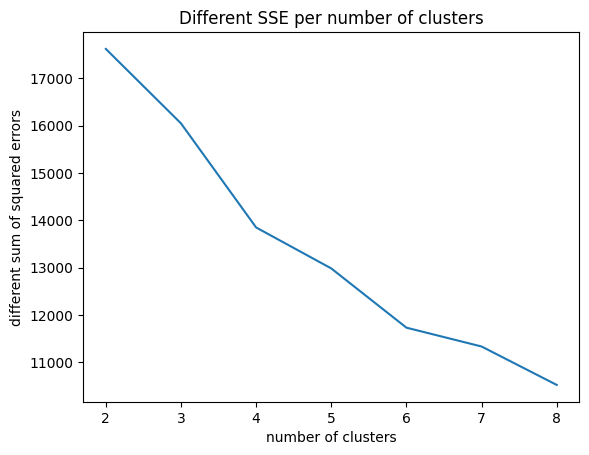

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

accounts = pd.read_csv('accounts.csv').iloc[:, :8]
accounts = accounts.dropna()
accounts = accounts.drop_duplicates()
accounts = pd.get_dummies(accounts, drop_first=True)
accounts = MinMaxScaler().fit_transform(accounts)

ks = [2, 3, 4, 5, 6, 7, 8]
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42, max_iter=500)
    model.fit(accounts)
    inertias.append(model.inertia_)

sns.lineplot(
    data=pd.DataFrame({
        'number of clusters': ks,
        'different sum of squared errors': inertias
    }),
    x='number of clusters',
    y='different sum of squared errors'
)

plt.title('Different SSE per number of clusters')
plt.show()

## Exercise 2

First component variability: 2.453 (11.679% of all variability)
Second component variability: 2.326 (11.076% of all variability)
Sum of variabilities: 4.779 (22.755% of all variability)


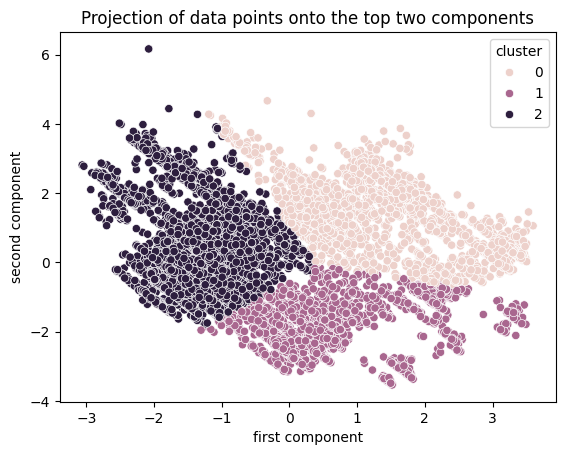

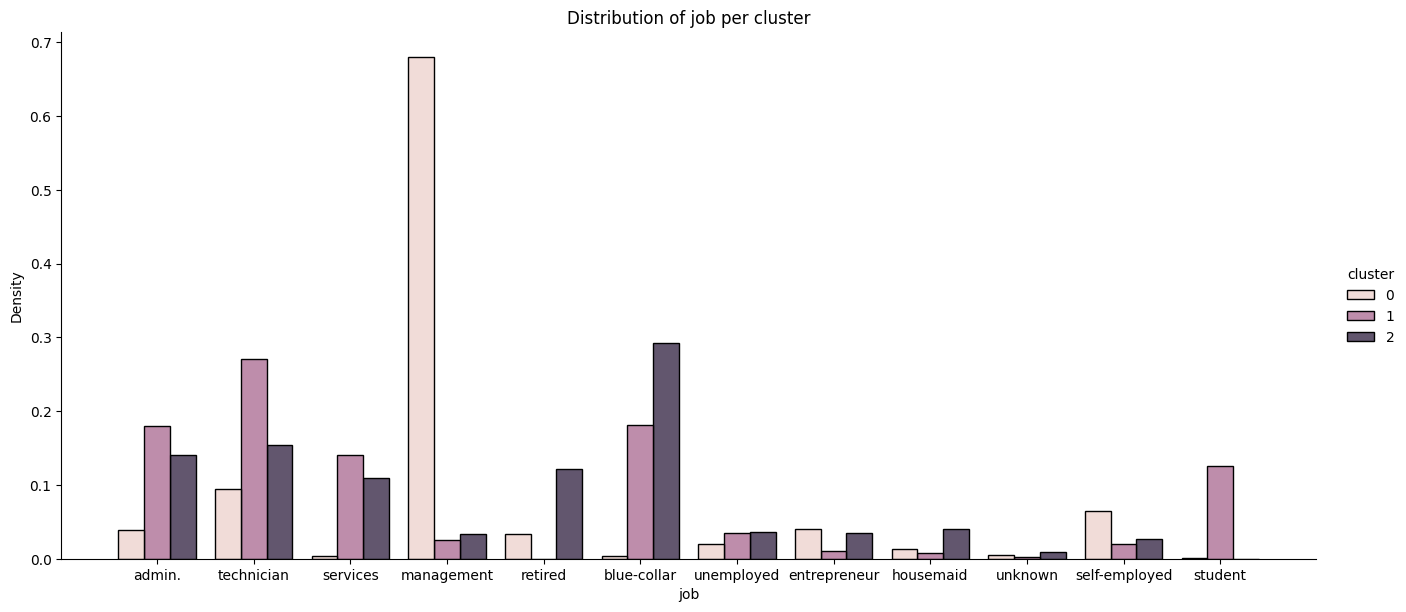

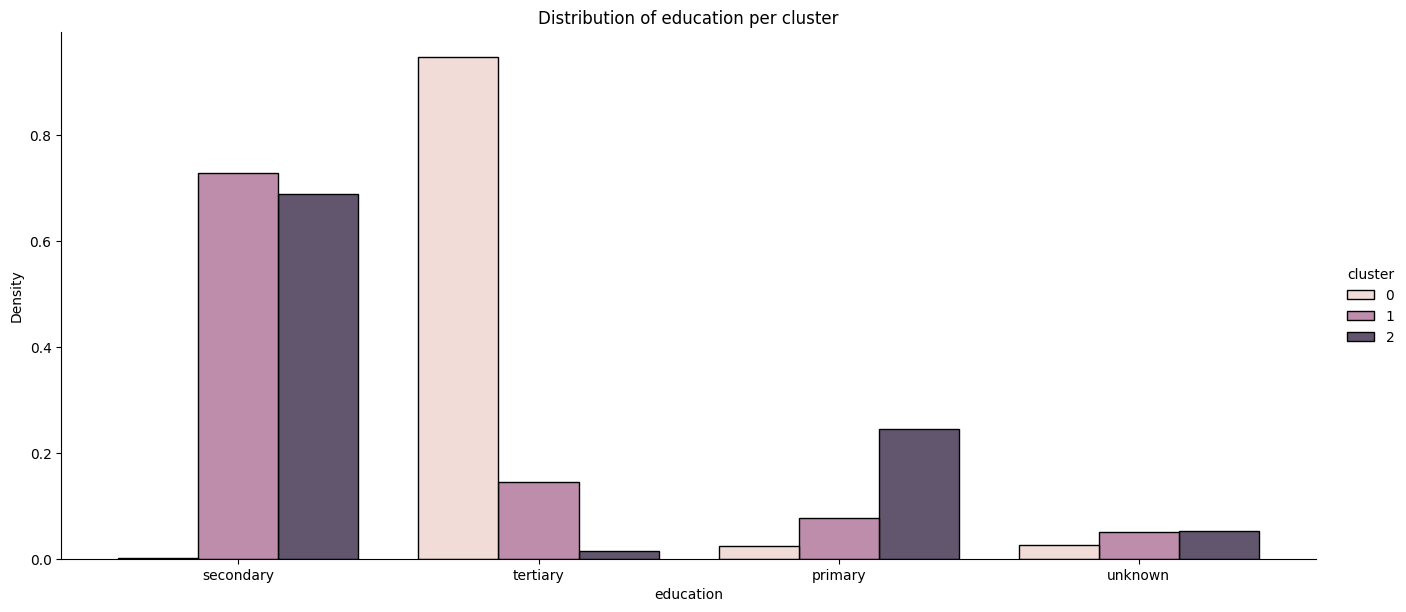

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

accounts = pd.read_csv('accounts.csv').iloc[:, :8].dropna().drop_duplicates()
accounts.reset_index(drop=True, inplace=True)
scaledAccounts = StandardScaler().fit_transform(pd.get_dummies(accounts, drop_first=True))
PCATransform = PCA(n_components=2).fit(scaledAccounts)

# a)
print(f"First component variability: {round(PCATransform.explained_variance_[0], 3)}" +
    f" ({round(PCATransform.explained_variance_ratio_[0] * 100, 3)}% of all variability)")

print(f"Second component variability: {round(PCATransform.explained_variance_[1], 3)}" +
    f" ({round(PCATransform.explained_variance_ratio_[1] * 100, 3)}% of all variability)")

print(f"Sum of variabilities: {round(PCATransform.explained_variance_[0], 3) + round(PCATransform.explained_variance_[1], 3)}" +
    f" ({round(round(PCATransform.explained_variance_ratio_[0] * 100, 3) + round(PCATransform.explained_variance_ratio_[1] * 100, 3), 3)}% of all variability)")

# b)
model = KMeans(n_clusters=3, random_state=42)
model.fit(scaledAccounts)

decomposedAccounts = PCATransform.transform(scaledAccounts)

sns.scatterplot(
    data=pd.DataFrame({
        'first component': decomposedAccounts[:, 0],
        'second component': decomposedAccounts[:, 1],
        'cluster': model.labels_
    }),
    x='first component',
    y='second component',
    hue ='cluster'
)

plt.title('Projection of data points onto the top two components')
plt.show()

# c)
clusters = pd.DataFrame({"cluster": model.labels_})

for feat in ('job', 'education'):
    sns.displot(
        data=pd.concat([accounts, clusters], axis=1),
        x=feat,
        multiple="dodge", 
        stat="density", 
        shrink=0.8, 
        common_norm=False,
        hue='cluster',
        height=6,
        aspect=2.25
    )
    plt.title(f"Distribution of {feat} per cluster")

plt.show()